
# #Task 7: Stock Market Prediction Using Textual and Numerical Analysis

Step1: Importing important packages

In [126]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

Step 2: Downloading News(textual) Dataset and Stock-Prices(Numerical) of BSE-SENSEX Dataset


In [29]:
stock_data = yf.download("^BSESN", start="2001-01-02", end="2022-03-13")

#news_data.csv is downloaded from https://bit.ly/36fFPI6
news_data = pd.read_csv('news_data.csv')

[*********************100%***********************]  1 of 1 completed


In [16]:
#Saving the dataset
stock_data.to_csv('stock_data.csv')

Step 3: Glimpse at the Datasets

In [6]:
type(news_data['publish_date'][0])


numpy.int64

In [3]:
news_data

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [19]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [33]:
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], format='%Y%m%d')


In [34]:
news_data

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [35]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


In [30]:
stock_data.reset_index(inplace=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...,...
5217,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100
5218,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300
5219,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100
5220,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800


In [31]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5222 non-null   datetime64[ns]
 1   Open       5222 non-null   float64       
 2   High       5222 non-null   float64       
 3   Low        5222 non-null   float64       
 4   Close      5222 non-null   float64       
 5   Adj Close  5222 non-null   float64       
 6   Volume     5222 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 285.7 KB


Step 4: Textual Analysis-Sentiment Analysis from News Headlines

In [36]:
news_data['sentiment'] = news_data['headline_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [37]:
# Accounting for average sentiment as multiple headlines are for same day
average_sentiment = news_data.groupby('publish_date')['sentiment'].mean().reset_index()

In [38]:
average_sentiment

,publish_date,sentiment
0,2001-01-02,0.042829
1,2001-01-03,0.011280
2,2001-01-04,0.038048
3,2001-01-05,0.141441
4,2001-01-06,0.128030
...,...,...
7712,2022-03-27,0.009895
7713,2022-03-28,0.026582
7714,2022-03-29,0.038279
7715,2022-03-30,0.013004


In [39]:
average_sentiment.rename(columns = {'publish_date':'Date'}, inplace = True)

In [40]:
average_sentiment

,Date,sentiment
0,2001-01-02,0.042829
1,2001-01-03,0.011280
2,2001-01-04,0.038048
3,2001-01-05,0.141441
4,2001-01-06,0.128030
...,...,...
7712,2022-03-27,0.009895
7713,2022-03-28,0.026582
7714,2022-03-29,0.038279
7715,2022-03-30,0.013004


Step 5: Merging the numerical and textual datasets

In [66]:
Merging the numerical and textual datasets
merged_data=pd.merge(stock_data,average_sentiment,how='left',on='Date')

In [67]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,0.042829
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,0.011280
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,0.038048
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,0.141441
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,0.010363
...,...,...,...,...,...,...,...,...
5217,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100,0.033451
5218,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300,0.019172
5219,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100,0.025492
5220,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800,0.024070


Step 6: Creating New Features/Metrics (Feature Engg.)

In [68]:
merged_data['MA10'] = merged_data['Close'].rolling(window=10).mean()#moving average of 10 days
merged_data['MA20'] = merged_data['Close'].rolling(window=20).mean()#moving average of 20 days
merged_data['MA50'] = merged_data['Close'].rolling(window=50).mean()#moving average of 50 days
merged_data['daily_return'] = merged_data['Close'].pct_change()
merged_data['volatility'] = merged_data['daily_return'].rolling(window=10).std()

In [69]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,MA10,MA20,MA50,daily_return,volatility
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,0.042829,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,0.011280,NaN,NaN,NaN,0.010237,NaN
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,0.038048,NaN,NaN,NaN,0.013633,NaN
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,0.141441,NaN,NaN,NaN,0.016611,NaN
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,0.010363,NaN,NaN,NaN,-0.015130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100,0.033451,55660.017578,56792.220898,58194.597656,-0.027443,0.019233
5218,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300,0.019172,55234.067578,56582.365820,58120.593281,0.011001,0.020179
5219,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100,0.025492,54968.732422,56424.303320,58065.135078,0.022897,0.022356
5220,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800,0.024070,54791.965625,56274.224414,58016.473281,0.014952,0.023189


In [70]:
#Data Cleaning-dropping the rows with undefined values
merged_data.dropna(inplace=True)

In [71]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,MA10,MA20,MA50,daily_return,volatility
49,2001-03-14,3508.129883,3757.120117,3493.939941,3725.030029,3725.030029,0,0.024560,3963.132959,4117.096472,4179.685781,0.052075,0.037656
50,2001-03-15,3666.199951,3823.780029,3661.840088,3819.860107,3819.860107,0,0.023822,3920.414966,4089.933984,4175.705386,0.025458,0.035247
51,2001-03-16,3752.360107,3867.469971,3696.520020,3745.739990,3745.739990,0,0.000000,3867.823975,4055.321472,4169.419785,-0.019404,0.034893
52,2001-03-19,3728.510010,3774.689941,3680.260010,3722.489990,3722.489990,0,0.051130,3830.556982,4024.929980,4161.562183,-0.006207,0.033406
53,2001-03-20,3736.090088,3740.070068,3644.510010,3672.399902,3672.399902,0,0.034596,3797.984961,3991.017480,4151.335581,-0.013456,0.033061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100,0.033451,55660.017578,56792.220898,58194.597656,-0.027443,0.019233
5218,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300,0.019172,55234.067578,56582.365820,58120.593281,0.011001,0.020179
5219,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100,0.025492,54968.732422,56424.303320,58065.135078,0.022897,0.022356
5220,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800,0.024070,54791.965625,56274.224414,58016.473281,0.014952,0.023189


In [72]:
merged_data.reset_index(inplace=True)
merged_data.drop(columns='index',inplace=True)

In [74]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,MA10,MA20,MA50,daily_return,volatility
0,2001-03-14,3508.129883,3757.120117,3493.939941,3725.030029,3725.030029,0,0.024560,3963.132959,4117.096472,4179.685781,0.052075,0.037656
1,2001-03-15,3666.199951,3823.780029,3661.840088,3819.860107,3819.860107,0,0.023822,3920.414966,4089.933984,4175.705386,0.025458,0.035247
2,2001-03-16,3752.360107,3867.469971,3696.520020,3745.739990,3745.739990,0,0.000000,3867.823975,4055.321472,4169.419785,-0.019404,0.034893
3,2001-03-19,3728.510010,3774.689941,3680.260010,3722.489990,3722.489990,0,0.051130,3830.556982,4024.929980,4161.562183,-0.006207,0.033406
4,2001-03-20,3736.090088,3740.070068,3644.510010,3672.399902,3672.399902,0,0.034596,3797.984961,3991.017480,4151.335581,-0.013456,0.033061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100,0.033451,55660.017578,56792.220898,58194.597656,-0.027443,0.019233
5152,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300,0.019172,55234.067578,56582.365820,58120.593281,0.011001,0.020179
5153,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100,0.025492,54968.732422,56424.303320,58065.135078,0.022897,0.022356
5154,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800,0.024070,54791.965625,56274.224414,58016.473281,0.014952,0.023189


In [77]:
#storing the clean dataset in final_data 
final_data = merged_data


In [78]:
final_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,MA10,MA20,MA50,daily_return,volatility
0,2001-03-14,3508.129883,3757.120117,3493.939941,3725.030029,3725.030029,0,0.024560,3963.132959,4117.096472,4179.685781,0.052075,0.037656
1,2001-03-15,3666.199951,3823.780029,3661.840088,3819.860107,3819.860107,0,0.023822,3920.414966,4089.933984,4175.705386,0.025458,0.035247
2,2001-03-16,3752.360107,3867.469971,3696.520020,3745.739990,3745.739990,0,0.000000,3867.823975,4055.321472,4169.419785,-0.019404,0.034893
3,2001-03-19,3728.510010,3774.689941,3680.260010,3722.489990,3722.489990,0,0.051130,3830.556982,4024.929980,4161.562183,-0.006207,0.033406
4,2001-03-20,3736.090088,3740.070068,3644.510010,3672.399902,3672.399902,0,0.034596,3797.984961,3991.017480,4151.335581,-0.013456,0.033061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,2022-03-07,53172.511719,53203.871094,52367.101562,52842.750000,52842.750000,17100,0.033451,55660.017578,56792.220898,58194.597656,-0.027443,0.019233
5152,2022-03-08,52430.058594,53484.261719,52260.820312,53424.089844,53424.089844,16300,0.019172,55234.067578,56582.365820,58120.593281,0.011001,0.020179
5153,2022-03-09,53793.988281,54893.730469,53367.519531,54647.328125,54647.328125,14100,0.025492,54968.732422,56424.303320,58065.135078,0.022897,0.022356
5154,2022-03-10,56242.468750,56242.468750,54982.820312,55464.390625,55464.390625,9800,0.024070,54791.965625,56274.224414,58016.473281,0.014952,0.023189


Step 7: Visualisation of The features created as a result of feature engg.

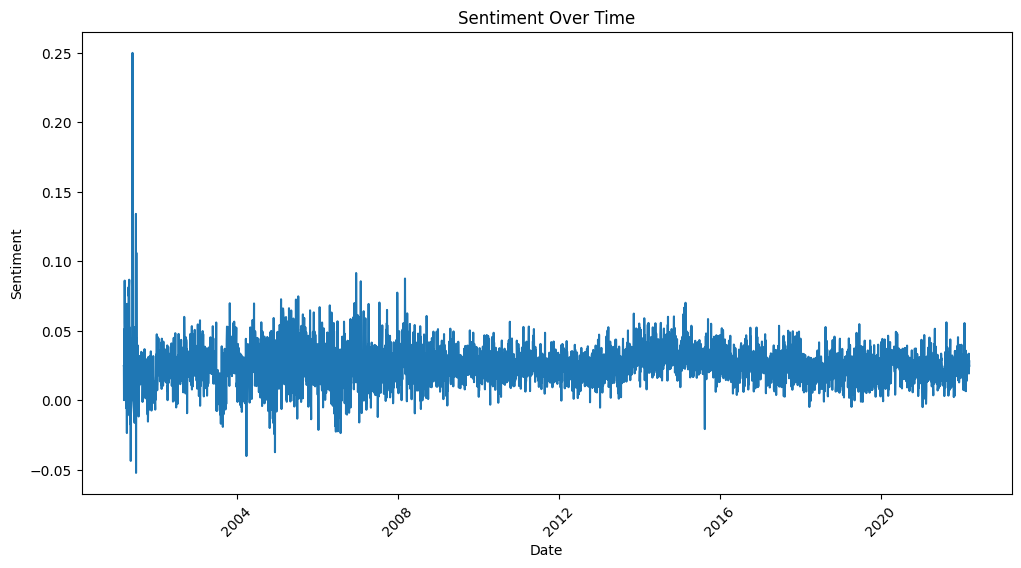

In [117]:
# Plotting the news headline sentiment
plt.figure(figsize=(12, 6))
plt.plot(final_data['Date'], final_data['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.xticks(rotation=45)
plt.show()


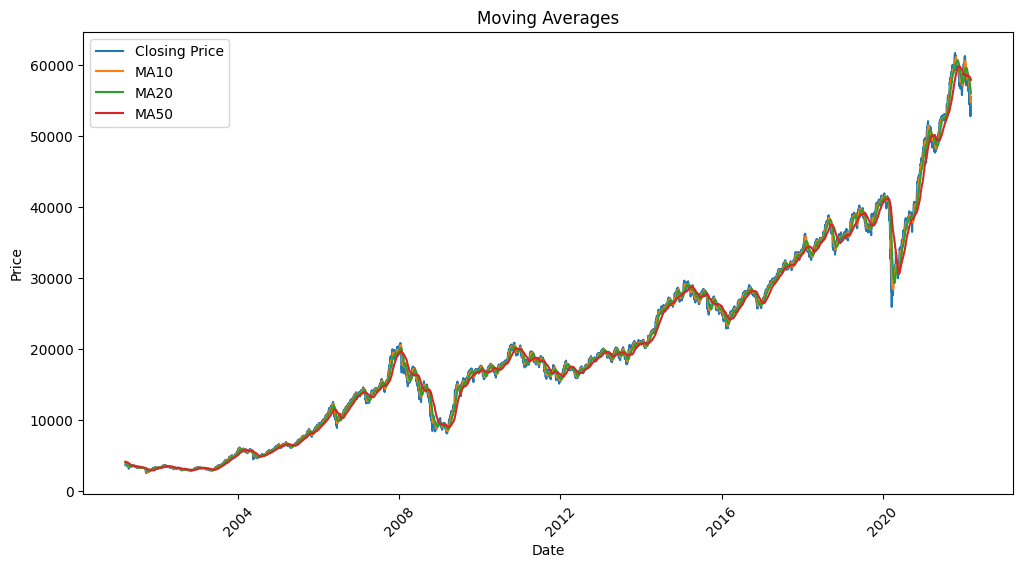

In [121]:
# Plotting the moving averages
plt.figure(figsize=(12, 6))
plt.plot(final_data['Date'], final_data['Close'], label='Closing Price')
plt.plot(final_data['Date'], final_data['MA10'], label='MA10')
plt.plot(final_data['Date'], final_data['MA20'], label='MA20')
plt.plot(final_data['Date'], final_data['MA50'], label='MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

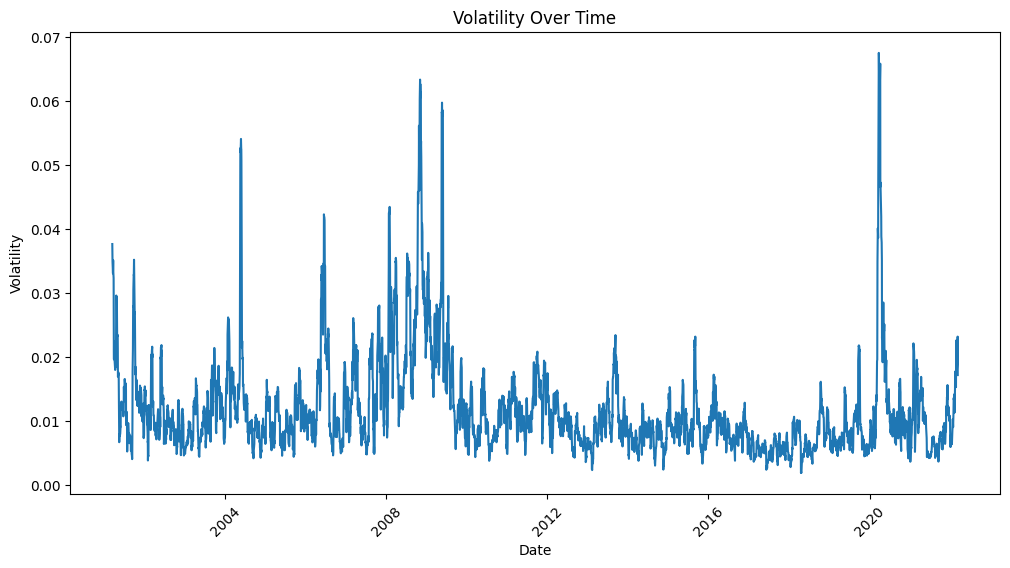

In [122]:
# Plotting the volatility
plt.figure(figsize=(12, 6))
plt.plot(final_data['Date'], final_data['volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Over Time')
plt.xticks(rotation=45)
plt.show()

Step 8: Splitting the dataset into training and test datasets

In [107]:
#Split the data into training and testing sets
train_data = final_data.iloc[:len(final_data)-100]
test_data = final_data.iloc[len(final_data)-100:]

Step 9: Feature Scaling to normalise the features 

In [ ]:
scaler = MinMaxScaler()

numerical_features = ['daily_return', 'volatility', 'sentiment','Open','Low','High','MA10','MA20','MA50','Volume']
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

Step 10: EXTREME GRADIENT BOOSTING REGRESSOR  to predict the closing stock prices

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=0)
xgb_model.fit(train_data[numerical_features], train_data['Close'])
test_data['predicted_close_price'] = xgb_model.predict(test_data[numerical_features])


In [124]:
# Viewing Predicted close price in test dataset
test_data

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,MA10,MA20,MA50,daily_return,volatility,predicted_close_price
5056,2021-10-19,1.005729,1.004763,0.999486,61716.050781,61716.050781,0.000270,0.235705,1.004202,1.002829,1.002630,0.428716,0.058929,61507.187500
5057,2021-10-20,0.999709,0.998605,0.991270,61259.960938,61259.960938,0.001521,0.214020,1.006837,1.004806,1.005172,0.407110,0.072013,61491.195312
5058,2021-10-21,0.995618,0.994233,0.980705,60923.500000,60923.500000,0.000229,0.221697,1.009851,1.006557,1.007545,0.413334,0.061660,61486.691406
5059,2021-10-22,0.986945,0.990841,0.981814,60821.621094,60821.621094,0.000295,0.180552,1.011840,1.007378,1.009827,0.425862,0.059150,61175.398438
5060,2021-10-25,0.992929,0.990586,0.980095,60967.050781,60967.050781,0.000330,0.245433,1.013419,1.008184,1.012172,0.439188,0.055960,61326.308594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,2022-03-07,0.853962,0.852241,0.843172,52842.750000,52842.750000,0.000537,0.283852,0.920712,0.947584,1.005650,0.341347,0.264192,52337.062500
5152,2022-03-08,0.841419,0.856971,0.841371,53424.089844,53424.089844,0.000512,0.236632,0.913305,0.943903,1.004303,0.467426,0.278600,52531.125000
5153,2022-03-09,0.864460,0.880748,0.860119,54647.328125,54647.328125,0.000443,0.257534,0.908691,0.941130,1.003294,0.506438,0.311773,54663.554688
5154,2022-03-10,0.905823,0.903499,0.887483,55464.390625,55464.390625,0.000308,0.252830,0.905618,0.938498,1.002408,0.480381,0.324467,56095.820312


Step 11: Model Evaluation

In [125]:
mse = mean_squared_error(test_data['Close'], test_data['predicted_close_price'])
mae = mean_absolute_error(test_data['Close'], test_data['predicted_close_price'])

print("Root Mean Squared Error:", np.sqrt(mse))
print("Root Mean Absolute Error:", np.sqrt(mae))

Root Mean Squared Error: 365.13766154410746
Root Mean Absolute Error: 16.754121461225594


Step 12: Plotting the predicted and actual closing prices

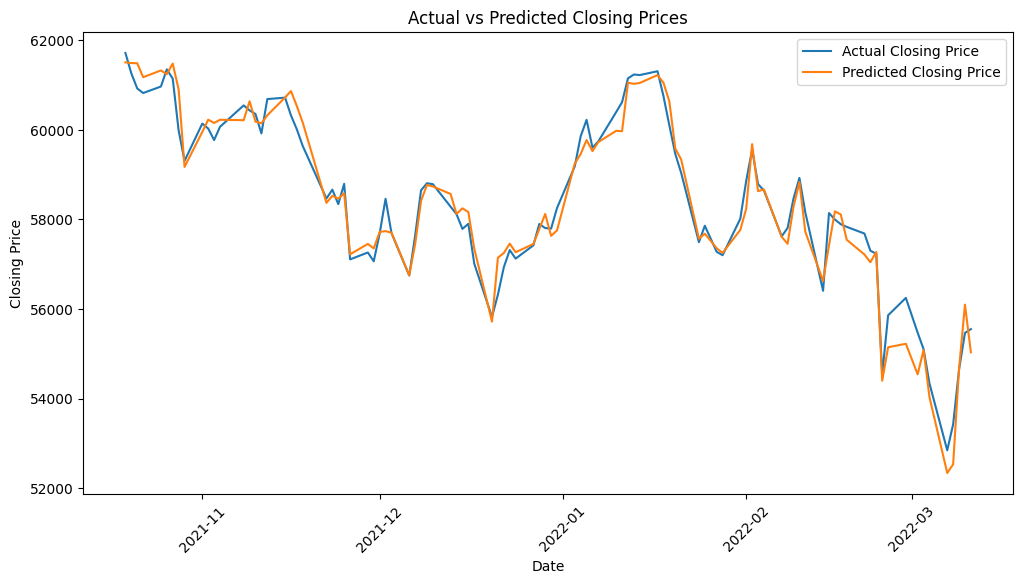

In [113]:

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Closing Price')
plt.plot(test_data['Date'], test_data['predicted_close_price'], label='Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()



                                                                        *** ***